In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Reading data

In [18]:
df = pd.read_csv("https://github.com/KaushikNITK/Research-rehashed/raw/main/high_diamond_ranked_10min.csv")

#Data Cleaning

In [19]:
df = df.drop("gameId", axis=1)

In [20]:
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


#checking for relavence with bluewins

In [21]:
df2 = df.copy()
df2.corr()["blueWins"].abs().sort_values(ascending=False)

blueWins                        1.000000
redGoldDiff                     0.511119
blueGoldDiff                    0.511119
redExperienceDiff               0.489558
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
redTotalGold                    0.411396
redGoldPerMin                   0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
blueDeaths                      0.339297
redKills                        0.339297
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
redEliteMonsters                0.221551
blueDragons                     0.213768
redTotalMinionsK

#Droping non relavent features

In [22]:
to_drop = [
    "redGoldDiff",
    "blueGoldDiff",
    "redExperienceDiff",
    "blueExperienceDiff",
    "redFirstBlood",
    "redGoldPerMin",
    "blueGoldPerMin",
    "blueCSPerMin",
    "redCSPerMin",
    "redDeaths",
    "redKills",
    "redAssists",
    "blueAssists"
]
df2 = df.drop(to_drop, axis = 1)

#standardizing

In [23]:
diffFeatures = [
    "TotalGold",
    "TotalExperience",
    "AvgLevel",
    "TotalMinionsKilled",
    "EliteMonsters",
    "Dragons",
    "TotalJungleMinionsKilled",
    "TowersDestroyed",
    "Heralds",
    "WardsDestroyed",
    "WardsPlaced"
]

for i in diffFeatures :
    df2[i+"ratio"] = (df["blue"+i] - df["red"+i])/(df["blue"+i] + df["red"+i])

In [24]:
df2.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled',
       'TotalGoldratio', 'TotalExperienceratio', 'AvgLevelratio',
       'TotalMinionsKilledratio', 'EliteMonstersratio', 'Dragonsratio',
       'TotalJungleMinionsKilledratio', 'TowersDestroyedratio', 'Heraldsratio',
       'WardsDestroyedratio', 'WardsPlacedratio'],
      dtype='object')

In [26]:
temp = []
c = df2.corr()["blueWins"]
for i in diffFeatures :
    temp.append((i, c["blue"+i], c["red"+i], c[i+"ratio"], c[i+"ratio"] > max(abs(c["blue"+i]), abs(c["red"+i]))))

temp = pd.DataFrame(temp, columns = ["feature", "blue corr", "red corr", "ratio corr", "better?"])
temp

,feature,blue corr,red corr,ratio corr,better?
0,TotalGold,0.417213,-0.411396,0.513577,True
1,TotalExperience,0.396141,-0.387588,0.487807,True
2,AvgLevel,0.357820,-0.352127,0.451801,True
3,TotalMinionsKilled,0.224909,-0.212171,0.307961,True
4,EliteMonsters,0.221944,-0.221551,0.276028,True
5,Dragons,0.213768,-0.209516,0.266187,True
6,TotalJungleMinionsKilled,0.131445,-0.110994,0.167100,True
7,TowersDestroyed,0.115566,-0.103696,0.538545,True
8,Heralds,0.092385,-0.097172,0.206647,True
9,WardsDestroyed,0.044247,-0.055400,0.093960,True


In [27]:
to_drop = []
for i in diffFeatures :
    to_drop.append("blue"+i)
    to_drop.append("red"+i)

df2 = df2.drop(to_drop, axis=1)

#correlation and heatmap

In [28]:
df2.corr()["blueWins"].abs().sort_values(ascending=False)

blueWins                         1.000000
TowersDestroyedratio             0.538545
TotalGoldratio                   0.513577
TotalExperienceratio             0.487807
AvgLevelratio                    0.451801
blueDeaths                       0.339297
blueKills                        0.337358
TotalMinionsKilledratio          0.307961
EliteMonstersratio               0.276028
Dragonsratio                     0.266187
Heraldsratio                     0.206647
blueFirstBlood                   0.201769
TotalJungleMinionsKilledratio    0.167100
WardsDestroyedratio              0.093960
WardsPlacedratio                 0.039319
Name: blueWins, dtype: float64

<Axes: >

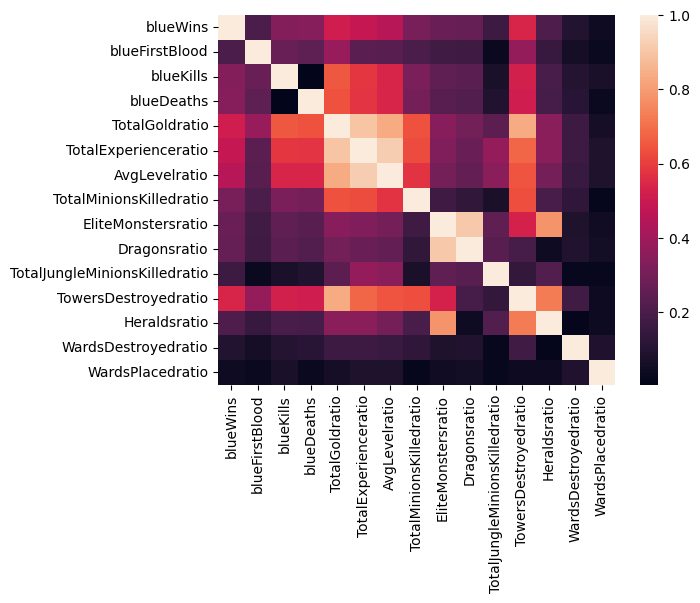

In [29]:
sns.heatmap(df2.corr().abs())

#Replacing NaN values by 0
0/0 is produced when standerdization (blue-red)/(blue+red) is done.
We can replace it with 0 as it does not produce any difference

In [30]:
df2.isnull().values.any()

True

In [31]:
df2=df2.fillna(0)
df2

,blueWins,blueFirstBlood,blueKills,blueDeaths,TotalGoldratio,TotalExperienceratio,AvgLevelratio,TotalMinionsKilledratio,EliteMonstersratio,Dragonsratio,TotalJungleMinionsKilledratio,TowersDestroyedratio,Heraldsratio,WardsDestroyedratio,WardsPlacedratio
0,0,1,9,6,0.019037,-0.000235,-0.014925,-0.005102,0.0,0.0,-0.208791,0.0,0.0,-0.500000,0.302326
1,0,0,5,5,-0.089942,-0.034804,-0.014925,-0.159420,-1.0,-1.0,-0.094737,-1.0,-1.0,0.000000,0.000000
2,0,0,7,11,-0.035092,-0.030859,-0.030303,-0.043702,1.0,1.0,0.243243,0.0,0.0,-1.000000,0.000000
3,0,0,4,5,-0.041758,-0.000195,0.000000,-0.077982,1.0,0.0,0.078431,0.0,1.0,-0.333333,0.482759
4,0,0,6,6,-0.029701,0.006241,0.000000,-0.034483,-1.0,-1.0,-0.080645,0.0,0.0,0.333333,0.630435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,1,7,4,0.076308,0.069618,0.028571,-0.040909,1.0,1.0,0.339806,0.0,0.0,-0.200000,-0.460317
9875,1,0,6,4,0.024673,0.023603,0.014085,0.061503,1.0,1.0,-0.076923,0.0,0.0,-1.000000,0.636364
9876,0,0,6,7,-0.070598,-0.049472,-0.027778,-0.108280,-1.0,-1.0,-0.142857,0.0,0.0,1.000000,0.243243
9877,0,1,2,3,-0.028195,-0.030526,-0.043478,-0.048832,1.0,1.0,0.090909,0.0,0.0,0.000000,-0.650000


#Model training
By logistic regression (from sklearn)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

In [33]:
sc = StandardScaler()
X, y = df2.drop(["blueWins"], axis=1), df2["blueWins"]
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [34]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
print(f"Training accurcay : {LRmodel.score(X_train, y_train)}")
print(f"Testing accurcay : {LRmodel.score(X_test, y_test)}")

Training accurcay : 0.7322011022382184
Testing accurcay : 0.7338056680161943
